In [42]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun

In [43]:
dry_run = False

Using genre from playlist source
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete



Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]



Dataset creation finished in: 7.1959 seconds


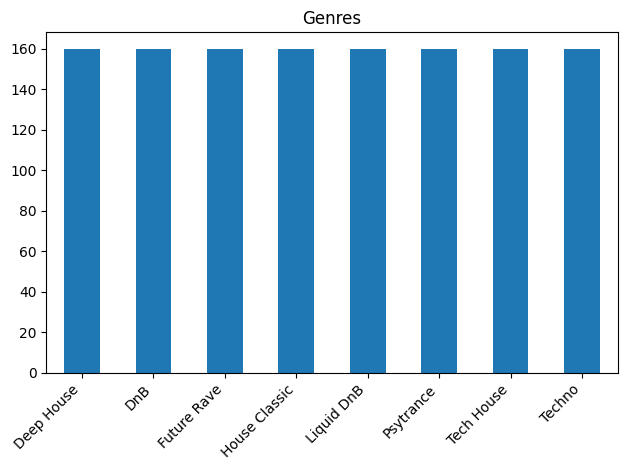

In [44]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        max_frames=16000 * 5,
        dry_run = dry_run
)

analysis.summarize_dataset(dataset)

  0%|          | 0.00/4.00 [00:00<?, ?epochs/s]

Starting training for 4 epochs
Epoch   1/4, train_loss: 2.077, train_acc: 0.149, val_loss: 2.067, val_acc: 0.211, in 2.45s
Epoch   2/4, train_loss: 2.062, train_acc: 0.232, val_loss: 2.031, val_acc: 0.258, in 2.04s
Epoch   3/4, train_loss: 2.044, train_acc: 0.247, val_loss: 2.013, val_acc: 0.250, in 1.92s
Epoch   4/4, train_loss: 2.030, train_acc: 0.243, val_loss: 2.003, val_acc: 0.266, in 1.84s
Training finished in: 8.2517 seconds

test_loss: 2.053, test_acc: 0.188


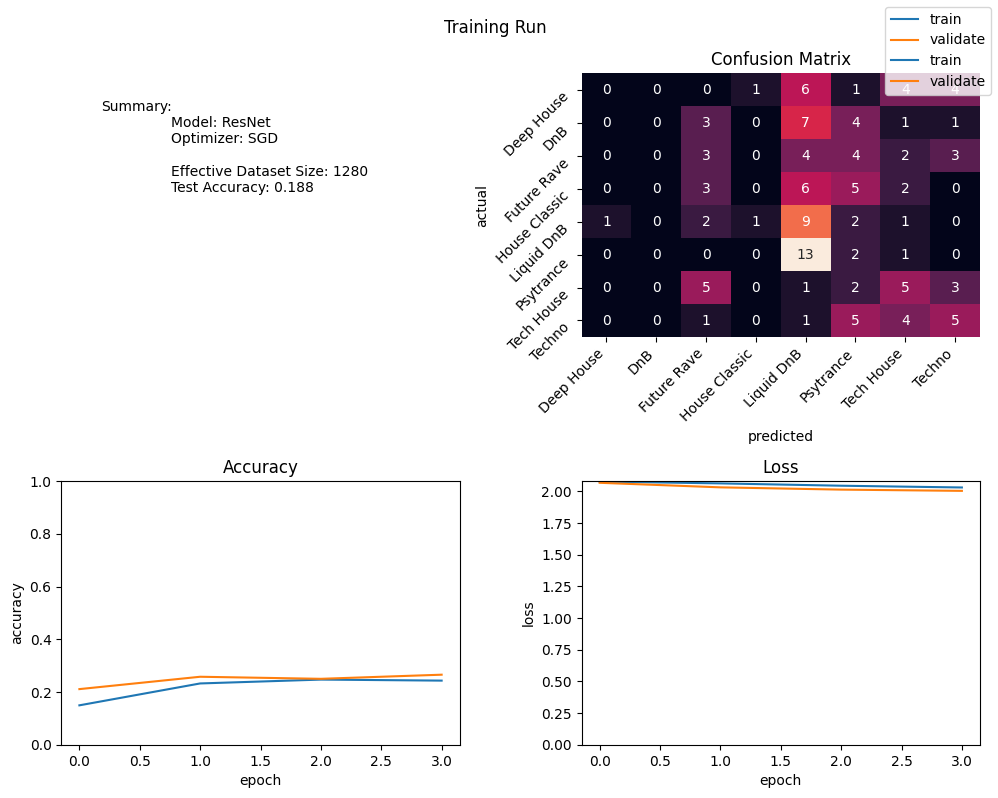

In [58]:
model = networks.ResNet(dataset.num_classes)
run = TrainingRun(dataset, model, epochs=4, dry_run=dry_run, repeat_count=1)
run.start()
run.test()
run.plot()

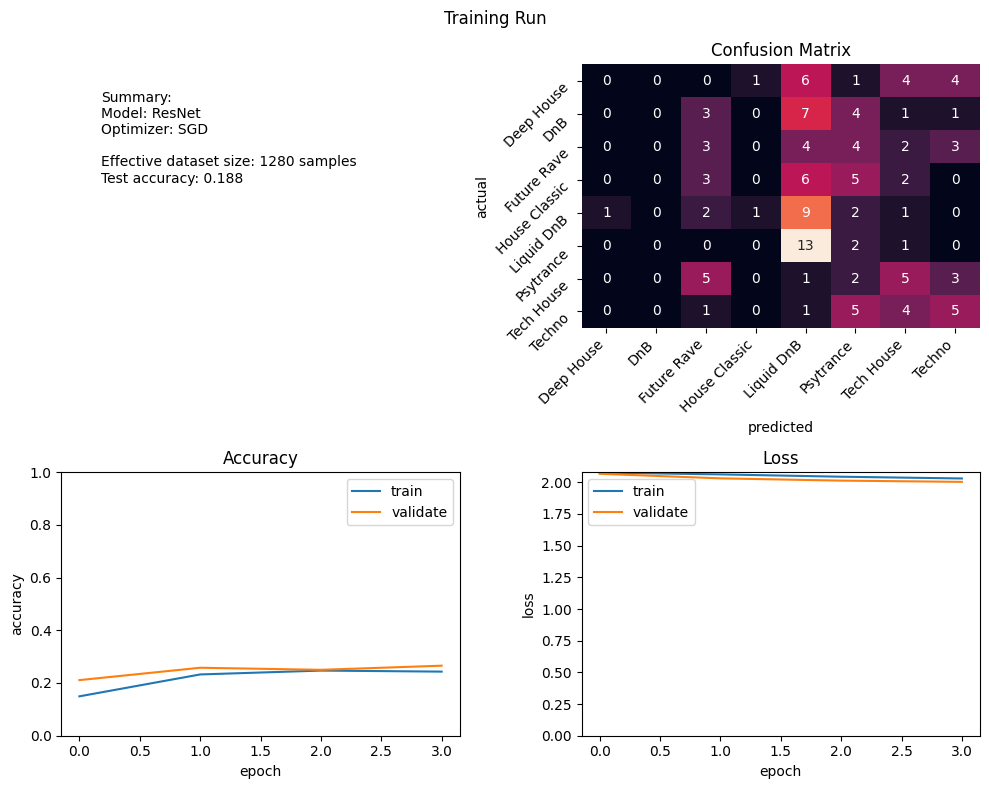

In [68]:
run.plot()